## Importing required libraries

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import scale

## Loading Dataset

In [2]:
df = pd.read_csv("Churn_Modelling.csv")

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.shape

(10000, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


## Descriptive Statistics

In [6]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


## Uni-variate analysis

(array([ 987.,  968., 1006., 1027., 1002., 1027., 1007.,  982., 1009.,
         985.]),
 array([1.1580000e+01, 2.0009670e+04, 4.0007760e+04, 6.0005850e+04,
        8.0003940e+04, 1.0000203e+05, 1.2000012e+05, 1.3999821e+05,
        1.5999630e+05, 1.7999439e+05, 1.9999248e+05]),
 <BarContainer object of 10 artists>)

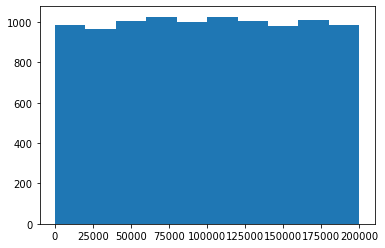

In [17]:
plt.hist(df["EstimatedSalary"])

(array([  19.,  166.,  447.,  958., 1444., 1866., 1952., 1525.,  968.,
         655.]),
 array([350., 400., 450., 500., 550., 600., 650., 700., 750., 800., 850.]),
 <BarContainer object of 10 artists>)

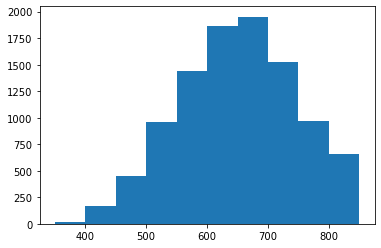

In [8]:
plt.hist(df["CreditScore"])

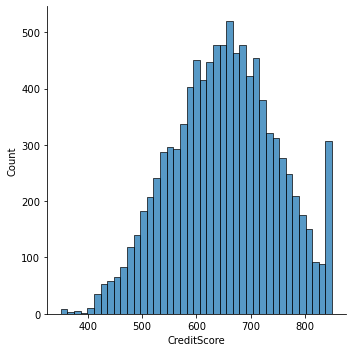

In [9]:
sns.displot(df["CreditScore"])

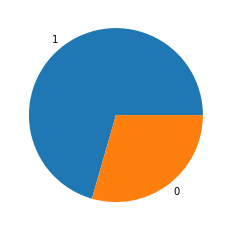

In [10]:
plt.pie(df["HasCrCard"].value_counts(), labels = df["HasCrCard"].unique())
plt.show()

## Bi-variate analysis

/Users/vishnuthulasidoss/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CreditScore', ylabel='EstimatedSalary'>

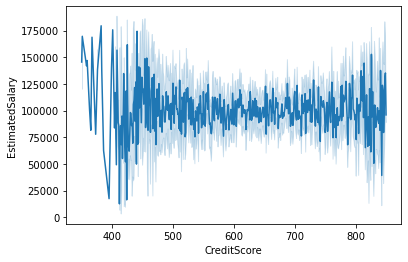

In [11]:
sns.lineplot(df.CreditScore,df.EstimatedSalary)

## Multi-variate analysis

<AxesSubplot:>

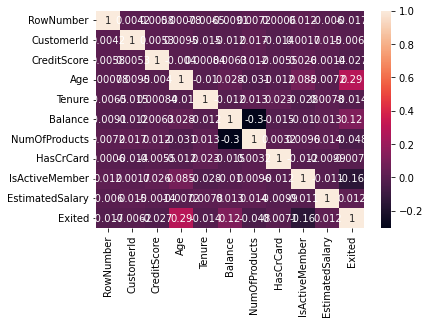

In [12]:
sns.heatmap(df.corr(),annot=True)

## Handling missing values

In [20]:
df.isnull().any()

RowNumber          False
CustomerId         False
Surname            False
CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

## Handling Outliers

<AxesSubplot:xlabel='EstimatedSalary'>

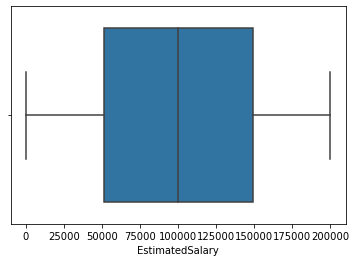

In [22]:
sns.boxplot(df.EstimatedSalary)

/Users/vishnuthulasidoss/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CreditScore'>

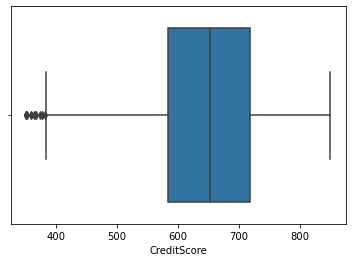

In [25]:
sns.boxplot(df["CreditScore"])

In [28]:
q2 = df.CreditScore.quantile(0.25)
q3 = df.CreditScore.quantile(0.75)
IQR = q3 - q2
upper_limit = q3+1.5*IQR
lower_limit = q2-1.5*IQR

In [32]:
df.median()

/var/folders/mn/03hvf_sd6t350bvr_3yy40680000gn/T/ipykernel_1233/530051474.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.median()


RowNumber          5.000500e+03
CustomerId         1.569074e+07
CreditScore        6.520000e+02
Age                3.700000e+01
Tenure             5.000000e+00
Balance            9.719854e+04
NumOfProducts      1.000000e+00
HasCrCard          1.000000e+00
IsActiveMember     1.000000e+00
EstimatedSalary    1.001939e+05
Exited             0.000000e+00
dtype: float64

In [33]:
df["CreditScore"] = np.where(df["CreditScore"]<lower_limit,6.52,df["CreditScore"])

/Users/vishnuthulasidoss/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CreditScore'>

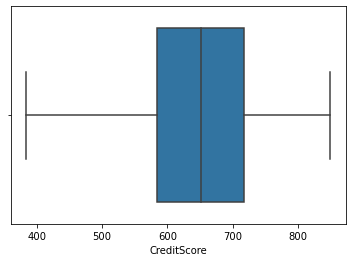

In [34]:
sns.boxplot(df["CreditScore"])

## Encoding Categorical Columns

In [35]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619.0,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608.0,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502.0,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699.0,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850.0,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [36]:
df.Geography.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [38]:
df.Gender.unique()

array(['Female', 'Male'], dtype=object)

In [39]:
le = LabelEncoder()

In [40]:
df.Geography = le.fit_transform(df.Geography)

In [41]:
df.Gender = le.fit_transform(df.Gender)

In [50]:
df.Surname = le.fit_transform(df.Surname)

In [52]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,1115,619.0,0,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,1177,608.0,2,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,2040,502.0,0,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,289,699.0,0,0,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,1822,850.0,2,0,43,2,125510.82,1,1,1,79084.10,0


## Split Independent and Dependent columns

In [53]:
y = df["EstimatedSalary"]
X = df.drop("EstimatedSalary",axis=1)

In [54]:
y

0       101348.88
1       112542.58
2       113931.57
3        93826.63
4        79084.10
          ...    
9995     96270.64
9996    101699.77
9997     42085.58
9998     92888.52
9999     38190.78
Name: EstimatedSalary, Length: 10000, dtype: float64

In [55]:
X

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
0,1,15634602,1115,619.0,0,0,42,2,0.00,1,1,1,1
1,2,15647311,1177,608.0,2,0,41,1,83807.86,1,0,1,0
2,3,15619304,2040,502.0,0,0,42,8,159660.80,3,1,0,1
3,4,15701354,289,699.0,0,0,39,1,0.00,2,0,0,0
4,5,15737888,1822,850.0,2,0,43,2,125510.82,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,1999,771.0,0,1,39,5,0.00,2,1,0,0
9996,9997,15569892,1336,516.0,0,1,35,10,57369.61,1,1,1,0
9997,9998,15584532,1570,709.0,0,0,36,7,0.00,1,0,1,1
9998,9999,15682355,2345,772.0,1,1,42,3,75075.31,2,1,0,1


## Scaling Independent Variables

In [56]:
scaled_X = pd.DataFrame(scale(X),columns=X.columns)

## Train Test Split

In [57]:
Xtrain,Xtest,ytrain,ytest = train_test_split(scaled_X,y,test_size=0.3,random_state=0)

In [58]:
Xtrain.shape

(7000, 13)

In [59]:
Xtest.shape

(3000, 13)

In [60]:
ytrain.shape

(7000,)

In [61]:
ytest.shape

(3000,)